# Credit One Data (Loan Default) - Classification
1. This data analysis uses **classification** on a preprocessed, cleansed and validated dataset.
2. A 70 and 30 split on the data were used for training and testing sets, respectively.
3. Models used - **Decision Tree**, **Random Forest**, **SVC** and **KNN** - Optimal algorithm chosen.

In [1]:
import warnings
warnings.filterwarnings('ignore')                # ignore warning (place prior to importing pandas)
warnings.simplefilter ('ignore')
import seaborn as sns
import pandas as pd
credit = pd.read_csv('CreditOne_Clean_2.csv', header = 0) 


In [3]:
import numpy as np
import scipy
from math import sqrt
import matplotlib.pyplot as plt
# The line below is for the plots to show (i.e. not in a separate window)
%matplotlib inline 
import time

# Estimators
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model Metrics
'''
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
'''
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report, confusion_matrix

# Cross validation
from sklearn.cross_validation import train_test_split

In [4]:
credit.info()
credit.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 97 columns):
LIMIT_BAL                     30000 non-null int64
AGE                           30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                      30000 non-null int64
PAY_AMT2                      30000 non-null int64
PAY_AMT3                      30000 non-null int64
PAY_AMT4                      30000 non-null int64
PAY_AMT5                      30000 non-null int64
PAY_AMT6                      30000 non-null int64
default payment next month    30000 non-null int64
SEX_1                         30000 non-null float64
SEX_2                         30000 non-null float64
EDUCATION_0                   30000 non-null float64
EDUCATION_1                   30000 non-null float64
EDUCATION_2                   30000 non-null float64
EDUCATION_3   

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT3,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,24,3913,689,0,0,689,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,120000,26,2682,2682,3261,0,1000,1000,1000,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,90000,34,29239,13559,15549,1518,1500,1000,1000,1000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50000,37,46990,49291,29547,2000,2019,1200,1100,1069,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50000,57,8617,35835,19131,2000,36681,10000,9000,689,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
crdt_LimBal_Age_rmv = credit.drop(['LIMIT_BAL', 'AGE'], axis=1)

In [6]:
crdt_LimBal_Age_rmv.info()
crdt_LimBal_Age_rmv.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 95 columns):
BILL_AMT1                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                      30000 non-null int64
PAY_AMT2                      30000 non-null int64
PAY_AMT3                      30000 non-null int64
PAY_AMT4                      30000 non-null int64
PAY_AMT5                      30000 non-null int64
PAY_AMT6                      30000 non-null int64
default payment next month    30000 non-null int64
SEX_1                         30000 non-null float64
SEX_2                         30000 non-null float64
EDUCATION_0                   30000 non-null float64
EDUCATION_1                   30000 non-null float64
EDUCATION_2                   30000 non-null float64
EDUCATION_3                   30000 non-null float64
EDUCATION_4                   30000 non-null float64
EDUCATION_

,BILL_AMT1,BILL_AMT3,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,3913,689,0,0,689,0,0,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2682,2682,3261,0,1000,1000,1000,0,2000,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,29239,13559,15549,1518,1500,1000,1000,1000,5000,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,46990,49291,29547,2000,2019,1200,1100,1069,1000,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8617,35835,19131,2000,36681,10000,9000,689,679,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
credit_ShowMissingCol = credit.iloc[:,10:80]      # showing partial missing columns from above
credit_ShowMissingCol.head()

,PAY_AMT6,default payment next month,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,...,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-2,PAY_5_-1,PAY_5_0
0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2000,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,5000,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1000,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,679,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
credit_ShowMissingCol_2 = credit.iloc[:,20:70]      # showing partial missing columns from above
credit_ShowMissingCol_2.head()

,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,age_encode_0,age_encode_1,age_encode_2,age_encode_3,loan_encode_0,...,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-2,PAY_4_-1,PAY_4_0,PAY_4_1
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
credit_ShowMissingCol_3 = credit.iloc[:,30:60]     # showing partial missing columns from above
credit_ShowMissingCol_3.head() 

,loan_encode_1,loan_encode_2,loan_encode_3,loan_encode_4,PAY_0_-2,PAY_0_-1,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,...,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_8,PAY_3_-2,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [10]:
credit_ShowMissingCol_3 = credit.iloc[:,40:50]     # showing partial missing columns from above
credit_ShowMissingCol_3.head() 

,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-2,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [11]:
credit_Class = crdt_LimBal_Age_rmv
credit_Class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 95 columns):
BILL_AMT1                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                      30000 non-null int64
PAY_AMT2                      30000 non-null int64
PAY_AMT3                      30000 non-null int64
PAY_AMT4                      30000 non-null int64
PAY_AMT5                      30000 non-null int64
PAY_AMT6                      30000 non-null int64
default payment next month    30000 non-null int64
SEX_1                         30000 non-null float64
SEX_2                         30000 non-null float64
EDUCATION_0                   30000 non-null float64
EDUCATION_1                   30000 non-null float64
EDUCATION_2                   30000 non-null float64
EDUCATION_3                   30000 non-null float64
EDUCATION_4                   30000 non-null float64
EDUCATION_

In [12]:
#features
features = credit_Class.iloc[:,0:94]     #choose only the columns that are needed for analysis (first two columns ommitted due to discretization)
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT3,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,...,PAY_5_8,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
0,3913,689,0,0,689,0,0,0,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2682,2682,3261,0,1000,1000,1000,0,2000,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,29239,13559,15549,1518,1500,1000,1000,1000,5000,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,46990,49291,29547,2000,2019,1200,1100,1069,1000,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8617,35835,19131,2000,36681,10000,9000,689,679,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#dependent variable
depVar = credit_Class['default payment next month']  # choose a column that is in a classification/dummy variable datatype (ex.default payment next month )

In [14]:
features.tail()

,BILL_AMT1,BILL_AMT3,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,...,PAY_5_8,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
29995,188948,208365,15980,8500,20000,5003,3047,5000,1000,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,1683,3502,0,1837,3526,8998,129,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,3565,2758,19357,0,0,22000,4200,2000,3100,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
29998,-1645,76304,48944,85900,3409,1178,1926,52964,1804,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29999,47929,49764,15313,2078,1800,1430,1000,1000,1000,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#Training Set (Feature Space: X Training)
X_train = (features[: 30000])                    # include all rows of dataset       
X_train.tail()

,BILL_AMT1,BILL_AMT3,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,...,PAY_5_8,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
29995,188948,208365,15980,8500,20000,5003,3047,5000,1000,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,1683,3502,0,1837,3526,8998,129,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,3565,2758,19357,0,0,22000,4200,2000,3100,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
29998,-1645,76304,48944,85900,3409,1178,1926,52964,1804,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29999,47929,49764,15313,2078,1800,1430,1000,1000,1000,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 30000]                                 # include all rows of dataset
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()                                                                   # displays 'default payment next month' 5 values

The number of observations in the Y training set are: 30000


0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [17]:
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       BILL_AMT1  BILL_AMT3  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
29900      16809          0          0         0         0         0   
29901      50845     103486      49387         0      6556      3250   
29902      10392     168955     124746    168096      6409      7335   
29903      27378      13333     172104     10018     13333        99   
29904      54952      54126      59728      2600      4553      5800   

       PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month   ...     \
29900         0         0         0                           1   ...      
29901      1563      1208       781                           0   ...      
29902      4448      4519      5003                           0   ...      
29903        99    172104     30013                           0   ...      
29904      2000      1000      1462                           1   ...      

       PAY_5_8  PAY_6_-2  PAY_6_-1  PAY_6_0  PAY

In [18]:
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900    1
29901    0
29902    0
29903    0
29904    1
Name: default payment next month, dtype: int64

In [19]:
# implement Cross Validation anytime we need to by simply running the following on the X and Y training sets:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=50)

In [20]:
# We can also use the shape function to double check that the split was made as needed:

X_train.shape, X_test.shape

((21000, 94), (9000, 94))

In [21]:
#Models
modelTree = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

modelRF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

modelSVC = SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

modelKNN = KNeighborsClassifier (n_neighbors = 5)

In [22]:
# Decision Tree
modelTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
# Random Forest
modelRF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
# SVM/SVC
modelSVC.fit(X_train,y_train)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
modelKNN.fit (X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
# Rate each model
#These values correspond to the the following:
#1st value:  The score array for test scores on each cv split. (Higher is an indicator of a better performing model)
#2nd value: The time for fitting the estimator on the train set for each cv split.
#3rd Value:  The time for scoring the estimator on the test set for each cv split.

In [26]:
print(cross_val_score(modelRF, X_train, y_train))     # Random Forest

[ 0.996       0.999       0.98785714]


In [27]:
print(cross_val_score(modelTree, X_train, y_train))   # Decision Tree

[ 1.  1.  1.]


In [28]:
print(cross_val_score(modelSVC, X_train, y_train))    # SVC

[ 0.78814286  0.79157143  0.78785714]


In [29]:
print(cross_val_score(modelKNN, X_train, y_train))   # KNN

[ 0.76457143  0.76628571  0.76942857]


In [30]:
PredDecTree = modelTree.predict(X_test)                        # Decision Tree
print ("Test set predictions: {}".format(PredDecTree))

Test set predictions: [0 0 0 ..., 0 0 0]


In [31]:
#Evaluate the model
Dtreeaccuracy = modelTree.score(X_test, y_test)                # Decision Tree
print ("Test set accuracy: {:.2f}".format(Dtreeaccuracy))

Test set accuracy: 1.00


In [32]:
# Evaluating performance of Decision Tree
DT_cv_score = cross_val_score(modelTree, X_test, y_test, cv=10, scoring='roc_auc')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, PredDecTree))
print('\n')

print("=== Classification Report ===")
print(classification_report(y_test, PredDecTree))
print('\n')

print("=== All AUC Scores ===")

print(DT_cv_score)
print('\n')

print("=== Mean AUC Score ===")
print("Mean AUC Score - Decision Tree: ", DT_cv_score.mean())

=== Confusion Matrix ===
[[7074    0]
 [   0 1926]]


=== Classification Report ===
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      7074
          1       1.00      1.00      1.00      1926

avg / total       1.00      1.00      1.00      9000



=== All AUC Scores ===
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


=== Mean AUC Score ===
Mean AUC Score - Decision Tree:  1.0


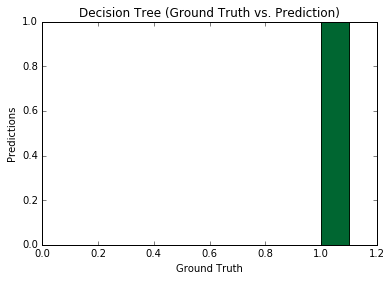

In [33]:
# Plot Decision Tree results

plt.bar(y_test, PredDecTree, color=['blue','green'], width=0.1, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title ("Decision Tree (Ground Truth vs. Prediction)")
plt.show();

In [34]:
PredRF = modelRF.predict(X_test)                            # Random Forest
print ("Test set predictions: {}".format(PredRF))

Test set predictions: [0 0 0 ..., 0 0 0]


In [35]:
#Evaluate the model                                          # Random Forest
RFaccuracy = modelRF.score(X_test, y_test)
print ("Test set accuracy: {:.2f}".format(RFaccuracy))

Test set accuracy: 0.99


In [36]:
# Evaluating performance of Random Forest
rfc_cv_score = cross_val_score(modelRF, X_test, y_test, cv=10, scoring='roc_auc')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, PredRF))
print('\n')

print("=== Classification Report ===")
print(classification_report(y_test, PredRF))
print('\n')

print("=== All AUC Scores ===")

print(rfc_cv_score)
print('\n')

print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[7072    2]
 [  63 1863]]


=== Classification Report ===
             precision    recall  f1-score   support

          0       0.99      1.00      1.00      7074
          1       1.00      0.97      0.98      1926

avg / total       0.99      0.99      0.99      9000



=== All AUC Scores ===
[ 0.99988291  1.          1.          1.          0.99997801  1.
  0.99996317  1.          1.          1.        ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.999982408745


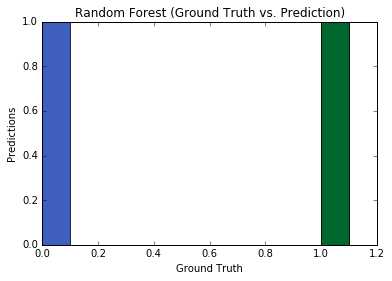

In [37]:
# Plot RF results

plt.bar(y_test, PredRF, color=['blue','green'], width=0.1, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title ("Random Forest (Ground Truth vs. Prediction)")
plt.show();

In [39]:
PredSVC = modelSVC.predict(X_test)                            # SVC
print ("Test set predictions: {}".format(PredSVC))

Test set predictions: [0 0 0 ..., 0 0 0]


In [41]:
#Evaluate the model                                           # SVC
SVCaccuracy = modelSVC.score(X_test, y_test)
print ("Test set accuracy: {:.2f}".format(SVCaccuracy))

Test set accuracy: 0.80


In [42]:
# Evaluating performance of SVM/SVC

SVC_cv_score = cross_val_score(modelSVC, X_test, y_test, cv=10, scoring='roc_auc')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, PredSVC))
print('\n')

print("=== Classification Report ===")
print(classification_report(y_test, PredSVC))
print('\n')

print("=== All AUC Scores ===")

print(SVC_cv_score)
print('\n')

print("=== Mean AUC Score ===")
print("Mean AUC Score - SVM-SVC: ", SVC_cv_score.mean())

=== Confusion Matrix ===
[[7062   12]
 [1807  119]]


=== Classification Report ===
             precision    recall  f1-score   support

          0       0.80      1.00      0.89      7074
          1       0.91      0.06      0.12      1926

avg / total       0.82      0.80      0.72      9000



=== All AUC Scores ===
[ 0.53165891  0.55943181  0.54290712  0.53611575  0.53396457  0.53558054
  0.54079738  0.52122746  0.52459041  0.54331315]


=== Mean AUC Score ===
Mean AUC Score - SVM-SVC:  0.536958708587


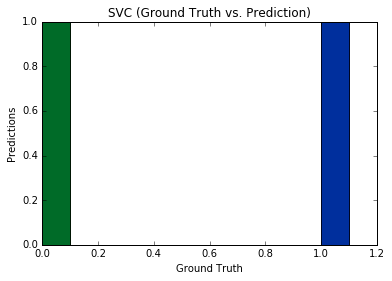

In [43]:
# Plot SVC results

plt.bar(y_test, PredSVC, color=['blue','green'], width=0.1, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title ("SVC (Ground Truth vs. Prediction)")
plt.show();

In [44]:
PredKNN = modelKNN.predict(X_test)                         # KNN
print ("Test set predictions: {}".format(PredKNN))

Test set predictions: [0 0 0 ..., 0 0 0]


In [45]:
#Evaluate the model
KNNaccuracy = modelKNN.score(X_test, y_test)               # KNN
print ("Test set accuracy: {:.2f}".format(KNNaccuracy))

Test set accuracy: 0.78


In [46]:
# Evaluating performance of KNN

KNN_cv_score = cross_val_score(modelKNN, X_test, y_test, cv=10, scoring='roc_auc')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, PredKNN))
print('\n')

print("=== Classification Report ===")
print(classification_report(y_test, PredKNN))
print('\n')

print("=== All AUC Scores ===")

print(KNN_cv_score)
print('\n')

print("=== Mean AUC Score ===")
print("Mean AUC Score - KNN: ", KNN_cv_score.mean())

=== Confusion Matrix ===
[[6601  473]
 [1545  381]]


=== Classification Report ===
             precision    recall  f1-score   support

          0       0.81      0.93      0.87      7074
          1       0.45      0.20      0.27      1926

avg / total       0.73      0.78      0.74      9000



=== All AUC Scores ===
[ 0.6118344   0.61131846  0.61420553  0.60262068  0.6287202   0.59253505
  0.60554058  0.62056886  0.53966658  0.60510962]


=== Mean AUC Score ===
Mean AUC Score - KNN:  0.603211995651


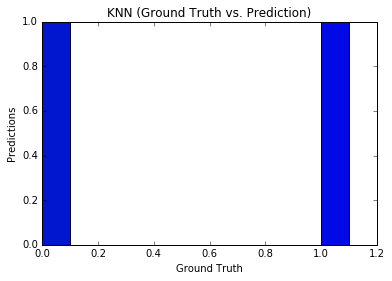

In [47]:
# Plot KNN results

plt.bar(y_test, PredKNN, color=['blue','green'], width=0.1, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title ("KNN (Ground Truth vs. Prediction)")
plt.show();